In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [2]:
os.chdir("E:\\PhD\\data sets\\CSV files")
df=pd.read_csv("china.csv")


In [3]:
df.head()

,id,afp,input,output,enquiry,file,interface,added,changed,deleted,pdr_afp,pdr_ufp,npdr_afp,npdu_ufp,resource,devtype,duration,n_effort,effort
0,1,1587,774,260,340,128,0,1502,0,0,4.7,5.0,4.7,5.0,4,0,4.0,7490,7490
1,2,260,9,4,3,193,41,51,138,61,16.0,16.6,16.0,16.6,2,0,17.0,4150,4150
2,3,152,25,33,28,42,35,163,0,0,4.4,4.1,4.4,4.1,1,0,9.0,668,668
3,4,252,151,28,8,39,0,69,153,4,12.8,14.3,15.5,17.3,1,0,4.0,3901,3238
4,5,292,93,0,194,20,0,0,307,0,10.3,9.8,12.4,11.7,1,0,13.0,3607,2994


In [4]:
df.drop(df.columns[[0, 17,]], axis=1, inplace=True)

In [5]:
df.head()

,afp,input,output,enquiry,file,interface,added,changed,deleted,pdr_afp,pdr_ufp,npdr_afp,npdu_ufp,resource,devtype,duration,effort
0,1587,774,260,340,128,0,1502,0,0,4.7,5.0,4.7,5.0,4,0,4.0,7490
1,260,9,4,3,193,41,51,138,61,16.0,16.6,16.0,16.6,2,0,17.0,4150
2,152,25,33,28,42,35,163,0,0,4.4,4.1,4.4,4.1,1,0,9.0,668
3,252,151,28,8,39,0,69,153,4,12.8,14.3,15.5,17.3,1,0,4.0,3238
4,292,93,0,194,20,0,0,307,0,10.3,9.8,12.4,11.7,1,0,13.0,2994


In [6]:
X=df.loc[:,df.columns !="effort"]
y=df["effort"]

In [7]:
X.shape

(499, 16)

In [8]:
y.shape

(499,)

In [9]:
lr = LinearRegression() 
kr=KNeighborsRegressor()
svr = SVR(kernel='linear', C=1)
dtr = DecisionTreeRegressor(random_state = 0)

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


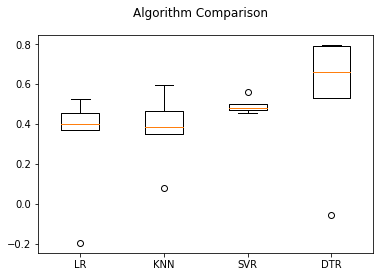

In [11]:
from sklearn.model_selection import cross_val_score
models = []
results=[]
names=[]
models.append(("LR",lr))
models.append(("KNN",kr))
models.append(("SVR",svr))
models.append(("DTR",dtr))


for name,m in models:
    
    scores = cross_val_score(m, X_train, y_train, cv=5)
    results.append(scores)
    names.append(name)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
vr = VotingRegressor(estimators=[('LR', lr), ('KNN', kr), ('SVR', svr),('DTR', dtr)] )
vr = vr.fit(X_train, y_train)
lr=lr.fit(X_train, y_train)
kr=kr.fit(X_train, y_train)
svr=svr.fit(X_train, y_train)
dtr=dtr.fit(X_train, y_train)

In [13]:
lr=lr.score(X_test,y_test)
kr=kr.score(X_test,y_test)
svr=svr.score(X_test,y_test)
vr=vr.score(X_test,y_test)
dtr=dtr.score(X_test,y_test)

In [14]:
scores=[lr,kr,svr,dtr,vr]

In [15]:
scores


[0.7096957078292097,
 0.6161851699074233,
 0.6200106928199308,
 0.773952225981709,
 0.7450557978708907]

<BarContainer object of 5 artists>

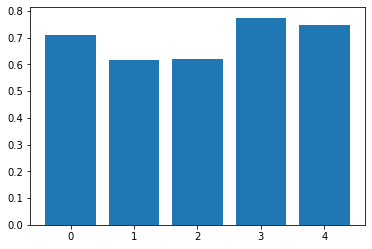

In [16]:
 plt.bar(range(5), scores)

# random forest Regressor Ensemble Bagging

In [17]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500, 
                                 max_leaf_nodes=16, 
                                 n_jobs=-1)
rfr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=16,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [18]:
rfr=rfr.score(X_test,y_test)
rfr

0.9291569065397218

# Ensemble boosting 

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=5, 
                                 n_estimators=3, 
                                 learning_rate=1.0)
gbrt.fit(X, y)
gbrt_score=gbrt.score(X_test,y_test)

In [20]:
gbrt_score

0.982169287836613

In [21]:
y_pred=gbrt.predict(X_test)
import numpy as np 
from sklearn.metrics import mean_squared_error 
gbrt_mse = mean_squared_error(y_pred, y_test) 
gbrt_rmse = np.sqrt(gbrt_mse) 
print('gradient boost RMSE: %.4f' % gbrt_rmse) 

gradient boost RMSE: 857.2440


# https://scikit-learn.org/stable/modules/model_evaluation.html

## Explained variance score

# The best possible score is 1.0, lower values are worse.

In [22]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9825618209572086

# The max_error does not support multioutput.

In [23]:
from sklearn.metrics import max_error
max_error(y_test, y_pred)

2963.0917939250085

# Mean absolute error

In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

603.0287657974619

#  mean_squared_error

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

734867.3466607843

# median_absolute_error

In [26]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, y_pred)

358.37304794806914

#  r2_score

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.982169287836613